# Test Notebook for functions in utilities

09/03/2022: tested with v0.6

In [1]:
#!pip install git+https://github.com/compi1234/pyspch.git
try:
    import pyspch
except ModuleNotFoundError:
    try:
        print(
        """
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

In [2]:
%matplotlib inline
import os,sys,io 
import scipy.signal

from urllib.request import urlopen
from IPython.display import display, Audio, HTML, clear_output
from ipywidgets import interact

import math,time
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 

    
import pyspch.sp as Sps
import pyspch.display as Spd
import pyspch.core as Spch

## Numerical Functions
some handy utilities:
- next_power_of_2()
- logf() and log10f(): log functions with flooring

In [17]:
a=17
arr=[33.,0.]
print(a,Spch.next_power_of_2(a))
print(arr,Spch.logf(arr,eps=1.e-10))
print(arr,Spch.log10f(arr,eps=1.e-10))

17 32
[33.0, 0.0] [  3.49650756 -23.02585093]
[33.0, 0.0] [  1.51851394 -10.        ]


### CONFUSION MATRIX

The confusion matrix can be a numpy array or a pandas DataFrame

[[0.1 0.8 0.1]
 [0.2 0.3 0.5]
 [0.9 0.1 0. ]]


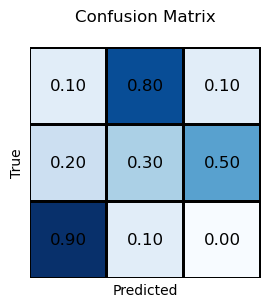

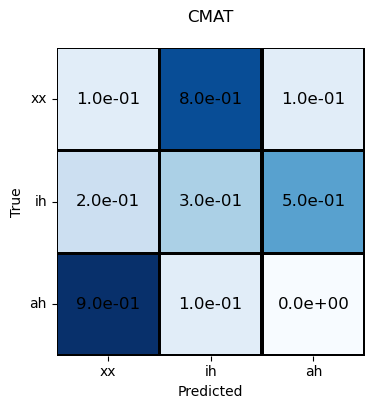

In [3]:
cm = np.array([[.1,.8,.1],[.2,.3,.5],[.9,.1,.0]])
labels=['xx','ih','ah']
print(cm)
Spch.plot_confusion_matrix(cm,fmt='.2f',figsize=(3,3));
#
Spch.plot_confusion_matrix(cm,fmt='.1e',labels=labels,title='CMAT\n');


In [4]:
help(Spch.plot_confusion_matrix)

Help on function plot_confusion_matrix in module pyspch.core.utils:

plot_confusion_matrix(cm, labels=[], title='Confusion Matrix\n', figsize=(4, 4), **kwargs)
    Plot a Confusion Matrix
    
    Arguments
        cm        confusion matrix, np.array or DataFrame
        labels    Default = []
        title     Default = 'Confusion Matrix'
        figsize   Default = (4,4)
        **kwargs  extra arguments to pass to sns.heatmap()



### Segmentations <--> Alignments (label sequences)

- Segmentations: are defined by times and labels for each segment
- Label sequences: give a frame based label sequence

seg2lbls() and lbls2seg() converts between two semi-equivalent labeling conventions

In [5]:
seg1 = pd.DataFrame({'t0':[.021,.0745,.10],'t1':[.0455,.078,.126],'seg':['x1','xx2','xxx3']})
seg1

,t0,t1,seg
0,0.0210,0.0455,x1
1,0.0745,0.0780,xx2
2,0.1000,0.1260,xxx3


In [6]:
lbls1 = Spch.seg2lbls(seg1,n_frames=15)
lbls1

[None,
 None,
 'x1',
 'x1',
 'x1',
 None,
 None,
 'xx2',
 None,
 None,
 'xxx3',
 'xxx3',
 'xxx3',
 None,
 None]

In [7]:
lbls2 = Spch.seg2lbls(seg1,n_frames=15,pad_lbl='x1')
lbls2, Spch.lbls2seg(lbls2)

(['x1',
  'x1',
  'x1',
  'x1',
  'x1',
  'x1',
  'x1',
  'xx2',
  'x1',
  'x1',
  'xxx3',
  'xxx3',
  'xxx3',
  'x1',
  'x1'],
      t0    t1   seg
 0  0.00  0.07    x1
 1  0.07  0.08   xx2
 2  0.08  0.10    x1
 3  0.10  0.13  xxx3
 4  0.13  0.15    x1)

In [8]:
# verify that the routines are invertible, after quantization to frame boundaries
seg1=Spch.lbls2seg(lbls1)
seg1_x = Spch.lbls2seg(Spch.seg2lbls(seg1))
seg1, seg1_x

(     t0    t1   seg
 0  0.00  0.02  None
 1  0.02  0.05    x1
 2  0.05  0.07  None
 3  0.07  0.08   xx2
 4  0.08  0.10  None
 5  0.10  0.13  xxx3
 6  0.13  0.15  None,
      t0    t1   seg
 0  0.00  0.02  None
 1  0.02  0.05    x1
 2  0.05  0.07  None
 3  0.07  0.08   xx2
 4  0.08  0.10  None
 5  0.10  0.13  xxx3
 6  0.13  0.15  None)